# Лабораторная работая №6
## Исследование кривых обучения и регуляризации
### Гончаров Ян

#### Задание к лабораторной работе.

1.	Построить и отрисовать кривые обучения для любых 2х моделей - регрессорах.
Сделать вывод – какая из моделей более подходит для предложенного датасета,
Проанализировать наличие недо- или пере- обученности, выдвинуть предложение о значении целевого показателя выбранной метрики.
Отрисовать целевое значение на построенном графике кривых обучения.
Для одной из моделей отрисовать кривую обучения относительно ошибки.
2.	Последовательно выполнить обучение моделей линейной регрессии, гребневой регуляризации (Ridge)  и Lasso регуляризации.
Сравнить модели используя несколько метрик.
Свести значения весовых коэффициентов в единую таблицу, сделать выводы о коллинеарности данных и о важности имеющихся признаков


#### Загрузим наш датасет

In [17]:
import pandas as pd

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", sep=' ', skipinitialspace=True, names=names)

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Будем сравнивать две модели:
1. Линейная регрессия
2. Дерево решений

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree

X = data.drop('MEDV', axis=1)
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regressor_tree = tree.DecisionTreeRegressor(max_depth=5)
regressor_linear = LinearRegression()

regressor_tree.fit(X_train, y_train)
regressor_linear.fit(X_train, y_train)

tree_pred = regressor_tree.predict(X_test)
linear_pred = regressor_linear.predict(X_test)

tree_r2 = r2_score(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)

linear_r2 = r2_score(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)

print("Tree:", "\nR2:", tree_r2, "\nMAE:", tree_mae)
print("Linear:", "\nR2:", linear_r2, "\nMAE:", linear_mae)

Tree: 
R2: 0.6727480725849063 
MAE: 3.1021794130970495
Linear: 
R2: 0.6354638433202133 
MAE: 3.6683301481357184


Оценки R2 примерно одинаковые, но у деревьев при нескольких перезапусках MAE стабильно ниже

#### Нарисуем кривые обучения, чтобы понять как влияет количество данных выборки на точность наших моделей

Будем использовать функцию learning_curve из библиотеки sklearn
Она в свою очередь будет использовать кросс-валидацию, то есть разбивать нашу выборку на k частей, после чего увеличивать количество тренировочных данных и повторять процедуру

1. [ o ] o o o o ; o [ o ] o o o ; ... ; o o o o [ o ]
2. [ o o ] o o o ; o [ o o ] o o ; ... ; o o o [ o o ]
...
n. [ o o o o ] o ; o [ o o o o ]

Для каждой выборки она будет считать оценку нашей модели и усреднять полученные в k разбиениях результаты
И построим график, состоящий из n точек, отражающий зависимость точности от количества данных

Training scores for different training sizes [0.97508155 0.97245737 0.965906   0.9681902  0.95748764 0.94377747
 0.9436159 ]
Testing scores for different training sizes [0.32149137 0.14760225 0.31686242 0.42056397 0.52999864 0.34522185
 0.52910209]


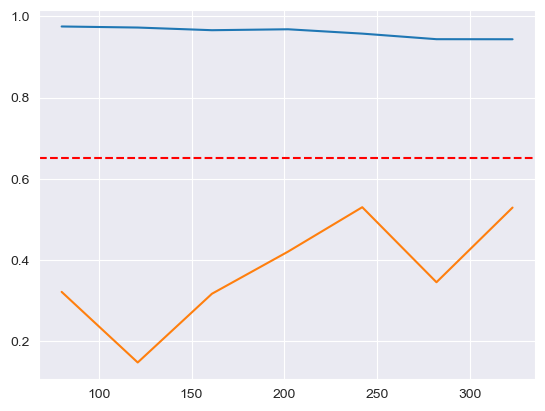

In [20]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
import numpy as np

estimator = tree.DecisionTreeRegressor(max_depth=5)

train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

print("Training scores for different training sizes", np.mean(train_scores, axis = 1))
print("Testing scores for different training sizes", np.mean(test_scores, axis = 1))

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.axhline(y = 0.65, color = 'red', linestyle='dashed')
plt.show()

Training scores for different training sizes [0.84540585 0.87059282 0.87527265 0.81268829 0.76745878]
Testing scores for different training sizes [-3.94865924 -3.32588548 -3.26013995 -2.60633253 -0.88186934]


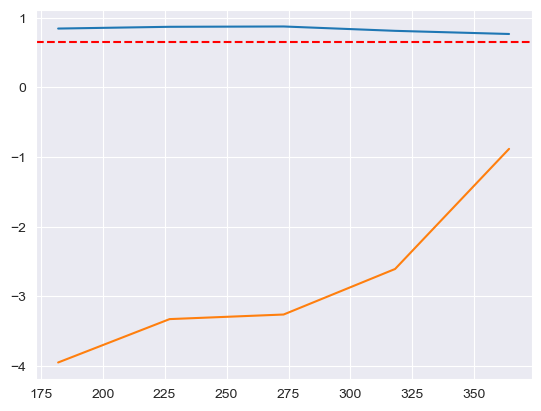

In [21]:
estimator = LinearRegression()

train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = 10,train_sizes = [0.4, 0.5, 0.6, 0.7, 0.8])

print("Training scores for different training sizes", np.mean(train_scores, axis = 1))
print("Testing scores for different training sizes", np.mean(test_scores, axis = 1))

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.axhline(y = 0.65, color = 'red', linestyle='dashed')
plt.show()

Видим что при увеличении количества данных, оценка на тренировочных данных падает не сильно, а на тренировочных повышается.
Можно сделать вывод, что увеличение количества данных имеет смысл для повышения качества обучения

#### Проанализируем наличие недо- или пере- обученности

In [22]:
tree_train_predict = regressor_tree.predict(X_train)
tree_test_predict = regressor_tree.predict(X_test)

tree_train_mae = mean_absolute_error(y_train, tree_train_predict)
tree_test_mae = mean_absolute_error(y_test, tree_test_predict)

print('Tree')
print("Prediction on train data:", tree_train_mae)
print("Prediction on test data:", tree_test_mae)

linear_train_predict = regressor_linear.predict(X_train)
linear_test_predict = regressor_linear.predict(X_test)

linear_train_mae = mean_absolute_error(y_train, linear_train_predict)
linear_test_mae = mean_absolute_error(y_test, linear_test_predict)

print('\nLinear')
print("Prediction on train data:", linear_train_mae)
print("Prediction on test data:", linear_test_mae)

Tree
Prediction on train data: 1.9406198990492693
Prediction on test data: 3.1021794130970495

Linear
Prediction on train data: 3.103966858299072
Prediction on test data: 3.6683301481357184


Полученная оценка на тренировочных данных далека от нуля и приблизительно равна оценке на тестовых данных, а значит модель обучена нормально

Однако исходя из графиков, модель обученная с помощью дерева кажется переобученной, а модели с линейной регрессией для нормального обучения не хватает данных (скорее всего тоже переобучена)

#### Регуляризация

Так как наши модели переобучены, для стоит применить алгоритмы регуляризации, чтобы привести результаты ближе к оптимальным
Сравним обычную линейную регрессию, регуляризацию L2 (Гребневую, Тихонова) и регуляризацию L1 (Lasso)

In [23]:
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regressor_linear = LinearRegression()
regressor_ridge = Ridge(alpha=2)
regressor_lasso = Lasso()

regressor_linear.fit(X_train, y_train)
regressor_ridge.fit(X_train, y_train)
regressor_lasso.fit(X_train, y_train)

linear_pred = regressor_linear.predict(X_test)
ridge_pred = regressor_ridge.predict(X_test)
lasso_pred = regressor_lasso.predict(X_test)

linear_res = pd.DataFrame({"Actual": y_test, "Predicted": linear_pred})
ridge_res = pd.DataFrame({"Actual": y_test, "Predicted": ridge_pred})
lasso_res = pd.DataFrame({"Actual": y_test, "Predicted": lasso_pred})

print(linear_res)
print(ridge_res)
print(lasso_res)

     Actual  Predicted
329    22.6  24.952333
371    50.0  23.616997
219    23.0  29.205886
403     8.3  11.960705
78     21.2  21.333620
..      ...        ...
49     19.4  17.538048
498    21.2  21.502223
309    20.3  23.632813
124    18.8  20.282598
306    33.4  35.179734

[127 rows x 2 columns]
     Actual  Predicted
329    22.6  25.004469
371    50.0  23.064980
219    23.0  28.582591
403     8.3  12.063464
78     21.2  20.518370
..      ...        ...
49     19.4  17.155087
498    21.2  21.871740
309    20.3  23.631599
124    18.8  19.800532
306    33.4  34.918284

[127 rows x 2 columns]
     Actual  Predicted
329    22.6  24.373933
371    50.0  23.900421
219    23.0  27.243679
403     8.3  14.512951
78     21.2  20.468463
..      ...        ...
49     19.4  19.131644
498    21.2  21.837646
309    20.3  25.120032
124    18.8  20.985547
306    33.4  32.189856

[127 rows x 2 columns]


Посмотрим на ошибки

In [24]:
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Linear:\n", "MAE:", linear_mae, "\nR2:", linear_r2)
print("\nRidge:\n", "MAE:", ridge_mae, "\nR2:", ridge_r2)
print("\nLasso:\n", "MAE:", lasso_mae, "\nR2:", lasso_r2)

Linear:
 MAE: 3.6683301481357184 
R2: 0.6354638433202133

Ridge:
 MAE: 3.681997656948208 
R2: 0.622212666392356

Lasso:
 MAE: 4.02970124573744 
R2: 0.5516247059049908


Линейная модель была переобучена, а с применением регуляризаций показатели метрик стали только хуже
я не знаю почему..
![title](https://imgur.com/a/qEHTrZZ)

Оценим веса:

In [25]:
coefficients = pd.DataFrame({
    'Linear': regressor_linear.coef_,
    'Ridge': regressor_ridge.coef_,
    'Lasso': regressor_lasso.coef_,})

coefficients

,Linear,Ridge,Lasso
0,-0.117735,-0.113791,-0.058738
1,0.044017,0.046025,0.049994
2,-0.005768,-0.045730,-0.001589
3,2.393416,2.214513,0.000000
4,-15.589421,-5.499684,-0.000000
5,3.768968,3.795196,0.761785
6,-0.007035,-0.016623,0.013047
7,-1.434956,-1.302847,-0.710109
8,0.240081,0.209589,0.195516
9,-0.011297,-0.011962,-0.014148


Смотря на коэффициенты, преображённые L1 регуляризацией, у нас есть несколько признаков которые совсем или очень мало влияют на точность модели, поэтому она свела или приблизила их к нулю. Точность модели от этого не стала выше, но возможно при изменении параметра альфа это можно изменить.
Как правильно подбирать параметр альфа я пока ещё не знаю